In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state=42)

In [3]:
# Building a tree
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)
print("Training set score", tree.score(X_train, y_train)) 
print("Test set score", tree.score(X_test, y_test))

Training set score 1.0
Test set score 0.9370629370629371


In [10]:
# Regularizing the tree
tree = DecisionTreeClassifier(max_depth = 4, random_state=0) 
tree.fit(X_train, y_train)
print("Training set score", tree.score(X_train, y_train)) 
print("Test set score", tree.score(X_test, y_test))

Training set score 0.9882629107981221
Test set score 0.951048951048951


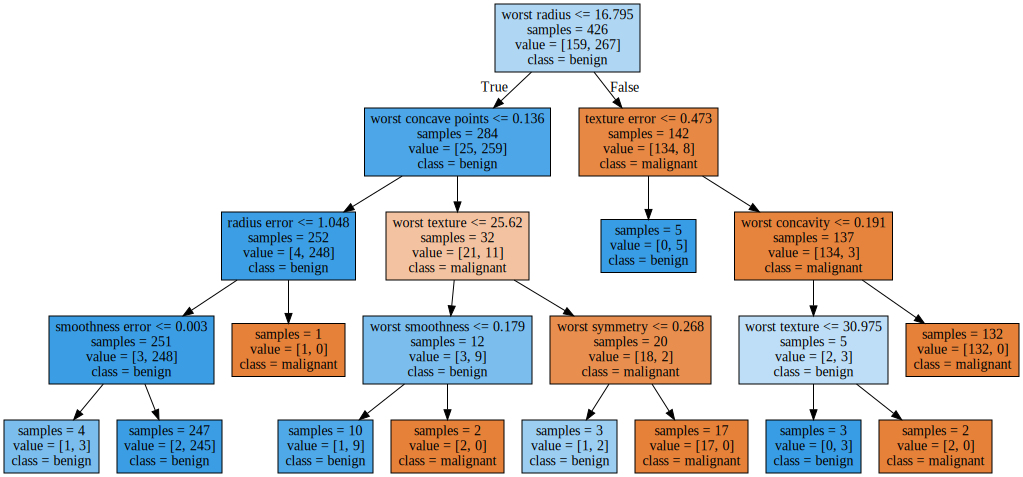

In [11]:
# Visualizing tree
from sklearn.tree import export_graphviz 

export_graphviz(tree, out_file="tree_dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree_dot") as f:
    dot_graph = f.read() 
    
graphviz.Source(dot_graph)

In [14]:
# The feature importances always sum to 1 
print("Feature importances:", tree.feature_importances_) 
print(tree.feature_importances_.shape) 
print(cancer.data.shape)

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
(30,)
(569, 30)


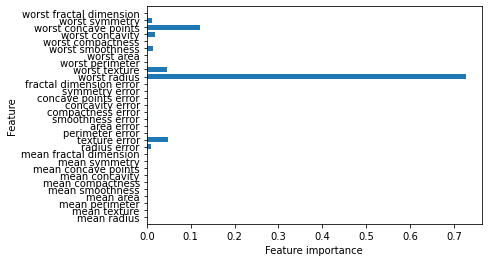

In [15]:
from matplotlib import pyplot as plt 

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature") 
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


Text(0, 0.5, 'Price in $/Mbyte')

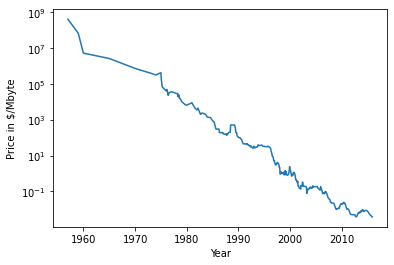

In [21]:
import mglearn 
import pandas as pd 
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv")) 
print(ram_prices)
# logscaling to y to improve visualziation
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [30]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000 

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date 
print(data_train.date.shape)
X_train = data_train.date[:, np.newaxis] 
print(X_train.shape)
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price) 
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data 
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all) 
# undo log-transform
price_tree = np.exp(pred_tree) 
price_lr = np.exp(pred_lr)

(202,)
(202, 1)


<ipython-input-30-0a728631a83a>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-30-0a728631a83a>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) 
# n_estimators number of trees, features to select
forest = RandomForestClassifier(n_estimators = 5, max_features = 1, random_state = 2) 
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=5, random_state=2)

In [32]:
display(forest.estimators_[0])

from sklearn.tree import export_graphviz 
export_graphviz(forest.estimators_[1], out_file="tree_dot", class_names=["Azul", "Roja"], 
                feature_names=["X0","X1"], impurity=False, filled=True)

DecisionTreeClassifier(max_features=1, random_state=1872583848)

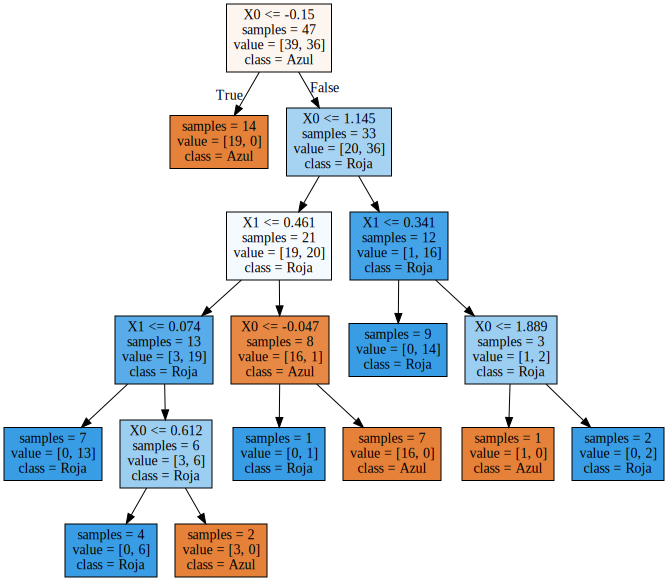

In [34]:
import graphviz 

with open("tree_dot") as f:
    dot_graph = f.read() 
    
graphviz.Source(dot_graph)

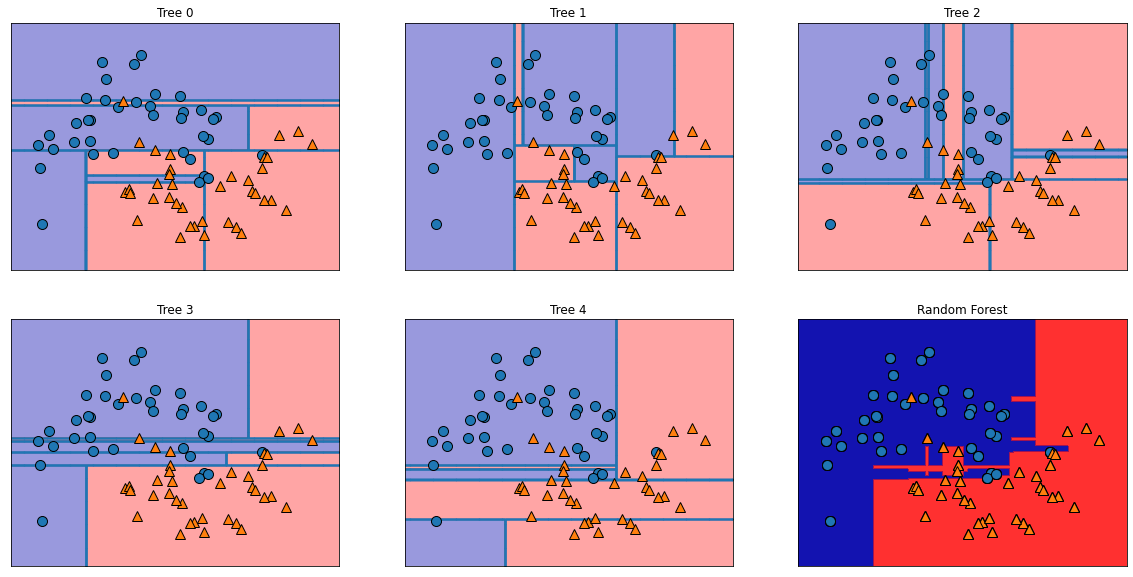

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)): 
    ax.set_title("Tree {}".format(i)) 
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax) 
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4) 
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)